In [58]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [59]:
import matplotlib
matplotlib.__version__

'3.1.1'

In [63]:
def load_data():
    symbols = [ 'AAPL', 'AMZN', 'BBT','GOOG', 'JPM', 'MMM', 'MSFT']

    n = len(symbols)
    prices_out, caps_out = [], []
    for s in symbols:
        dataframe = pd.read_csv('%s.csv' % s, index_col=None, parse_dates=['Date'])
        prices = list(dataframe['Close'])[-506:] # trailing window 506 days 2 roz bishtar vase roze aval va akhar ezafe
        prices_out.append(prices)
       
    return symbols, prices_out 

names, prices = load_data()   
n = len(names)

In [64]:
a = pd.read_csv('pricing.csv', index_col=0)

assets = a [-506:]
assets
#prices = list(assets)

,AAPL,AMZN,BBT,GOOG,JPM,MMM,MSFT
Date,,,,,,,
10/27/2017,163.050003,1100.949951,48.740002,1019.270020,101.769997,234.740005,83.809998
10/30/2017,166.720001,1110.849976,49.110001,1017.109985,101.410004,231.020004,83.889999
10/31/2017,169.039993,1105.280029,49.240002,1016.640015,100.610001,230.190002,83.180000
11/1/2017,166.889999,1103.680054,49.549999,1025.500000,100.919998,230.179993,83.180000
11/2/2017,168.110001,1094.219971,49.590000,1025.579956,101.589996,232.229996,84.050003
...,...,...,...,...,...,...,...
10/25/2019,246.580002,1761.329956,53.580002,1265.130005,126.029999,166.089996,140.729996
10/28/2019,249.050003,1777.079956,54.000000,1290.000000,126.510002,169.059998,144.190002
10/29/2019,243.289993,1762.709961,54.240002,1262.619995,126.430000,168.809998,142.830002


In [65]:
returns = assets.pct_change().dropna()

In [66]:
returns.head()

,AAPL,AMZN,BBT,GOOG,JPM,MMM,MSFT
Date,,,,,,,
10/30/2017,0.022508,0.008992,0.007591,-0.002119,-0.003537,-0.015847,0.000955
10/31/2017,0.013915,-0.005014,0.002647,-0.000462,-0.007889,-0.003593,-0.008463
11/1/2017,-0.012719,-0.001448,0.006296,0.008715,0.003081,-0.000043,0.000000
11/2/2017,0.007310,-0.008571,0.000807,0.000078,0.006639,0.008906,0.010459
11/3/2017,0.026114,0.015883,-0.001008,0.006728,-0.001772,-0.000043,0.001071


In [67]:
returns.columns

Index(['AAPL', 'AMZN', 'BBT', 'GOOG', 'JPM', 'MMM', 'MSFT'], dtype='object')

### Hierarchical Clustering

> Hierarchical clustering can be performed with a distance matrix. Then it repeatedly executed the following 2 steps:
1. Start by treating indivisual items as a cluster. Identify 2 clusters that are closest together
2. merge the 2 most similar clusters.

> This continues until all the clusters are merge together.


> The distance between 2 clusters can be computed based on length of the straight line, which is the Euclidean distance. This is called **measure of distance/similarity.**

> After selecting a distance metric, it is necessary to determine from where distance is computed. For example, it can be computed between the 2 similar parts of a cluster, the 2 least similar or some other criterion. This is called **Linkage Criteria**

In [68]:
# correlation matrix
corr = returns.corr()

In [69]:
# distance matrix
d_corr = np.sqrt(0.5*(1-corr))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


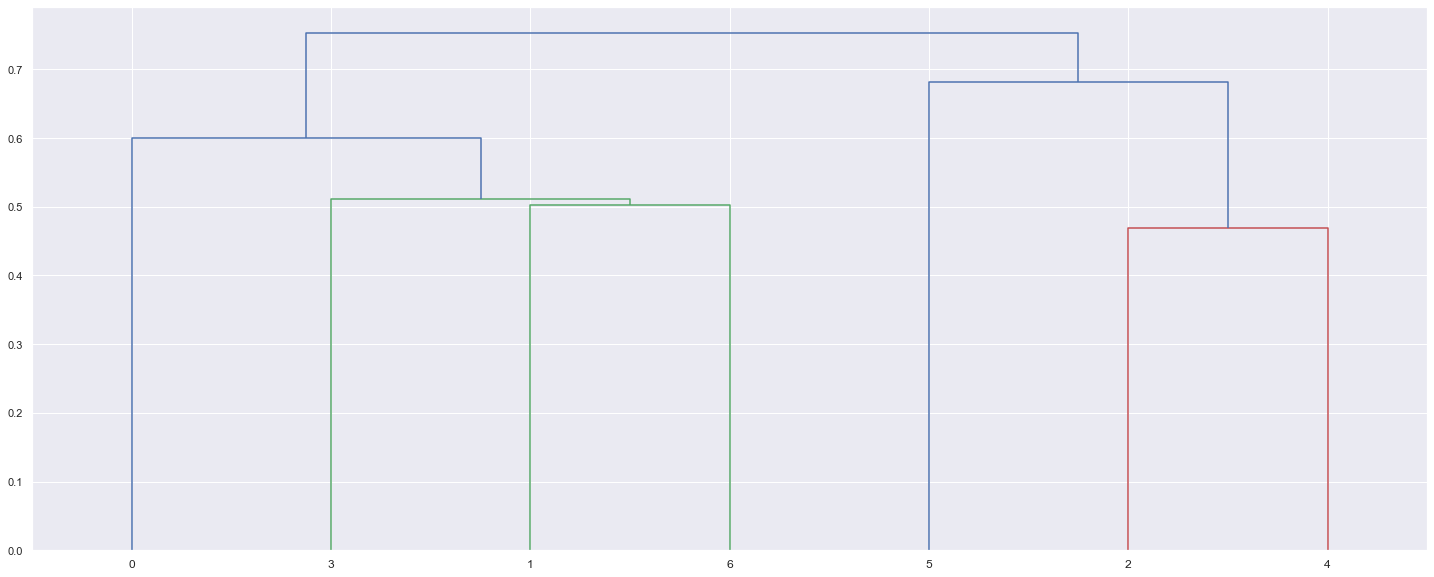

In [70]:
link = linkage(d_corr, 'single')
Z = pd.DataFrame(link)

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
# plt.show()

In [80]:
returns.columns

Index(['AAPL', 'AMZN', 'BBT', 'GOOG', 'JPM', 'MMM', 'MSFT'], dtype='object')

In [71]:
Z

,0,1,2,3
0,2.0,4.0,0.469382,2.0
1,1.0,6.0,0.502150,2.0
2,3.0,8.0,0.511284,3.0
3,0.0,9.0,0.599715,4.0
4,5.0,7.0,0.681725,3.0
5,10.0,11.0,0.753541,7.0


> This stage allows us to define a linkage matrix as an (N-1)x4 matrix with structure $Y = \{(y_{m,1},y_{m,2},y_{m,3},y_{m,4})\}_{m=1,...N-1}$ (i.e, with one 4-tuple per cluster). Items ($y_{m,1}, y_{m.2}$) report the constituents. Item $y_m,3$ reports the distance between $y_{m,1}$ and $y_{m,2}$. Item $y_{m,4}$ reports the number of original items included in cluster $m$

### Quasi-Diagonalization

> This stage reorganizes the rows and columns of the covariance matrix, so that the largest values lie along the diagonal. This quasi-diagonalization of the covariance matrix renders a useful property - similar investments are placed together, and dissimilar investments are placed far apart. 

> The algorithm works as follows -
1. We know that each row of the linkage matrix megers 2 branches into 1. We replace clusters in ($y_{N-1, 1}, y_{N-1,2}$) with their constituents recursively, until no clusters remain.
2. These replacemnets preserve the order of the clustering.
3. The output is a sorted list fo original items. 

In [72]:
def get_quasi_diag(link):
    
    # sort clustered items by distance
    
    link = link.astype(int)
    
    # get the first and the second item of the last tuple
    sort_ix = pd.Series([link[-1,0], link[-1,1]]) 
    
    # the total num of items is the third item of the last list
    num_items = link[-1, 3]
    
    # if the max of sort_ix is bigger than or equal to the max_items
    while sort_ix.max() >= num_items:
        # assign sort_ix index with 24 x 24
        sort_ix.index = range(0, sort_ix.shape[0]*2, 2) # odd numers as index
        
        df0 = sort_ix[sort_ix >= num_items] # find clusters
        
        # df0 contain even index and cluster index
        i = df0.index
        j = df0.values - num_items # 
        
        sort_ix[i] = link[j,0] # item 1
        
        df0  = pd.Series(link[j, 1], index=i+1)
        
        sort_ix = sort_ix.append(df0)
        sort_ix = sort_ix.sort_index()
        
        sort_ix.index = range(sort_ix.shape[0])
        
    
    return sort_ix.tolist()

In [73]:
sort_ix = get_quasi_diag(link)
sort_ix

[0, 3, 1, 6, 5, 2, 4]

### Recursive Bisection

> Stage 2 has delivered a quasi-diagonal matrix. The inverse - variance is optimal for a diagonal covariance matrix. We can take advantage of these facts in 2 different ways 
1. bottom-up, to define the variance of a contiguous subset as teh variance of an inverse-variance allocation.
2. top-down, to split allocations between adjacent subsets in inverse proportion to their aggregated variances.

In [74]:
def get_cluster_var(cov, c_items):
    cov_ = cov.iloc[c_items, c_items] # matrix slice
    # calculate the inversev-variance portfolio
    ivp = 1./np.diag(cov_)
    ivp/=ivp.sum()
    w_ = ivp.reshape(-1,1)
    c_var = np.dot(np.dot(w_.T, cov_), w_)[0,0]
    return c_var
def get_rec_bipart(cov, sort_ix):
    # compute HRP allocation
    # intialize weights of 1
    w = pd.Series(1, index=sort_ix)
    
    # intialize all items in one cluster
    c_items = [sort_ix]
    while len(c_items) > 0:
        # bisection
        """
        [[3, 6, 0, 9, 2, 4, 13], [5, 12, 8, 10, 7, 1, 11]]
        [[3, 6, 0], [9, 2, 4, 13], [5, 12, 8], [10, 7, 1, 11]]
        [[3], [6, 0], [9, 2], [4, 13], [5], [12, 8], [10, 7], [1, 11]]
        [[6], [0], [9], [2], [4], [13], [12], [8], [10], [7], [1], [11]]
        """
        c_items = [i[int(j):int(k)] for i in c_items for j,k in 
                   ((0,len(i)/2),(len(i)/2,len(i))) if len(i)>1]
        
        # now it has 2
        for i in range(0, len(c_items), 2):
            
            c_items0 = c_items[i] # cluster 1
            c_items1 = c_items[i+1] # cluter 2
            
            c_var0 = get_cluster_var(cov, c_items0)
            c_var1 = get_cluster_var(cov, c_items1)
            
            alpha = 1 - c_var0/(c_var0+c_var1)
            
            w[c_items0] *= alpha
            w[c_items1] *=1-alpha
    return w

In [75]:
cov = returns.cov()
weights = get_rec_bipart(cov, sort_ix)

In [76]:
new_index = [returns.columns[i] for i in weights.index]
weights.index = new_index

In [77]:
weights

AAPL    0.166874
GOOG    0.109207
AMZN    0.082379
MSFT    0.145993
MMM     0.155950
BBT     0.166282
JPM     0.173315
dtype: float64

In [51]:
import matplotlib.pyplot as pp
import pandas as pd
import numpy as np
import scipy.optimize as so
import seaborn as sb
sb.set()
%pylab
%matplotlib inline


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [78]:
prices = np.array(prices)

In [79]:
rf = 0.02  # Risk-free rate
markowits_budgets = []
markowitz_weights = []
markowits_budgets_ret = []
markowits_stock = []
results = []
stocks = [0] * 7
budget = 1000000
markowits_budgets_ret.append(0)
markowitz_weights.append(0)
markowits_budgets.append(0)
markowits_stock.append(0)
transaction_budget = budget
transactionCostFactor = 0.001
output = '{}\t|\t'.format('day')
names = [ 'AAPL', 'MSFT', 'MMM', 'AMZN', 'GOOG', 'JPM', 'BBT']
for name in names:
    output += '{} \t'.format(name)
output += '|\t{}'.format('Budget')
print(output)
print('-'*100)
print('{}\t|\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t|\t{}'.format(0,stocks[0], stocks[1], stocks[2], 
                                                          stocks[3], stocks[4], stocks[5],
                                                          stocks[6],
                                                          budget)) 

for i in range(13):
    start_idx = int((i*21) + 1)
    end_idx = int(start_idx + 252)
   
    

    
    
    current_prices = prices[:,((i*21)+1)+252] #mishe roze baad az balayi chon ta nadare, yani balayi age 253 bashe in 554e
    current_budget = budget
    #print (type(res.W))
    #weights = res.W
    weights = np.array(weights)
    print (weights)
    current_budget = budget
    transaction_budget = (current_budget + np.sum(current_prices*stocks))
    for index, (weights, current_closed_price) in enumerate(zip(weights, current_prices)):
        number_of_stock = int((weights * transaction_budget)/current_closed_price)
        if number_of_stock > stocks[index]: # buy
            total_cost = (number_of_stock - stocks[index]) * current_closed_price
            budget -= total_cost
            budget -= (total_cost * transactionCostFactor)
        elif number_of_stock < stocks[index]: # sell
            total_cost = (stocks[index] - number_of_stock) * current_closed_price
            budget += total_cost
            budget -= (total_cost * transactionCostFactor)
        stocks[index] = number_of_stock
        
        
    print('{}\t|\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t|\t{}'.format(((i*21)),stocks[0], stocks[1], stocks[2], 
                                                          stocks[3], stocks[4], stocks[5],
                                                          stocks[6],
                                                          budget))
    print('-'*100)
    print("Budget after selling all stocks of this day: ", budget + (stocks[0]*prices[0,((i*21)+1)+252]) + 
          (stocks[1]*prices[1,((i*21)+1)+252]) + (stocks[2]*prices[2,((i*21)+1)+252]) + (stocks[3]*prices[3,((i*21)+1)+252]) +
          (stocks[4]*prices[4,((i*21)+1)+252]) + (stocks[5]*prices[5,((i*21)+1)+252]) +
          (stocks[6]*prices[6,((i*21)+1)+252]))
    markowits_budgets_ret.append(((budget + (stocks[0]*prices[0,((i*21)+1)+252]) + (stocks[1]*prices[1,((i*21)+1)+252]) +
          (stocks[2]*prices[2,((i*21)+1)+252]) + (stocks[3]*prices[3,((i*21)+1)+252]) +
          (stocks[4]*prices[4,((i*21)+1)+252]) + (stocks[5]*prices[5,((i*21)+1)+252]) +
          (stocks[6]*prices[6,((i*21)+1)+252])) /1000000)-1)
    markowitz_weights.append(weights)
    markowits_budgets.append(budget + (stocks[0]*prices[0,((i*21)+1)+252]) + (stocks[1]*prices[1,((i*21)+1)+252]) +
          (stocks[2]*prices[2,((i*21)+1)+252]) + (stocks[3]*prices[3,((i*21)+1)+252]) +
          (stocks[4]*prices[4,((i*21)+1)+252]) + (stocks[5]*prices[5,((i*21)+1)+252]) +
          (stocks[6]*prices[6,((i*21)+1)+252]))
    markowits_stock.append((stocks[0], stocks[1], stocks[2], 
                                                          stocks[3], stocks[4], stocks[5],
                                                          stocks[6]))
                              

day	|	AAPL 	MSFT 	MMM 	AMZN 	GOOG 	JPM 	BBT 	|	Budget
----------------------------------------------------------------------------------------------------
0	|	0	0	0	0	0	0	0	|	1000000
[0.16687415 0.10920668 0.08237909 0.14599291 0.15594965 0.16628238
 0.17331514]
0	|	782	71	1706	140	1461	876	1670	|	714.855963821133
----------------------------------------------------------------------------------------------------
Budget after selling all stocks of this day:  999001.7131428211
0.17331514441708504


TypeError: zip argument #1 must support iteration